# requirements:
```
pandas
mecab-python3
scikit-learn
matplotlib
nlplt
```

In [1]:
import pandas as pd
import MeCab
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import rcParams
import nlplot

In [2]:
def mecab_sep(text,stopwords=['ため','とも']):
	m = MeCab.Tagger()
	node = m.parseToNode(text)
	words_list = []
	while node:
		if node.feature.split(",")[0] in ["名詞"] and node.surface not in stopwords:
			words_list.append(node.surface)
		node = node.next
	return words_list

### Bag-of-words / tf-idf
def calc_vecs(docs):
	vectorizer = TfidfVectorizer(analyzer=mecab_sep)
	vecs = vectorizer.fit_transform(docs)
	return vecs.toarray()

In [3]:
df = pd.read_csv("Dataset.csv",encoding='UTF-8')
tatget_labs = [
    '朝廣研','安部研','石田研','合志研','下川研',
    '成研','田中研','仲研','米元研','アプドゥハン研',
    '稲永研','于研','石田俊研','澤田研','安武研','前田研']

target_docs_df = df[df["研究室"].isin(tatget_labs )] 
target_docs_df.head()

,年度,学科／研究科,研究室,題目
3,H17,情報科学科,成研,対面教育を支援するためのウェブ助言システム
6,H17,情報科学科,仲研,生化学反応シミュレータの比較評価
7,H17,情報科学科,澤田研,FPGAを搭載したロボット教材のためのIPとしてKUE-CHIP2の検討
10,H17,情報科学科,稲永研,空港における目的地への交通手段検索システムの開発
11,H17,情報科学科,合志研,人の反応・判断能力測定用ドライビングシミュレータ


In [4]:
target_docs = target_docs_df["題目"].tolist()
all_docs_vecs = calc_vecs(target_docs_df["題目"])
n_clust = 10
# 参考：KMeans　k-means法によるクラスタリング
#  https://sabopy.com/py/scikit-learn-11/
vec = KMeans(n_clusters=n_clust, init="k-means++")
vec.fit(all_docs_vecs)
m = len(vec.labels_)
vec.labels_[:10]

array([4, 0, 9, 6, 0, 0, 3, 6, 0, 2])

In [5]:
target_docs_df["クラス"] = vec.labels_
#target_docs_df.insert(4,"クラス",vec.labels_) 
pd.crosstab(target_docs_df["研究室"],target_docs_df["クラス"])
cross_survive= pd.crosstab(target_docs_df['クラス'], target_docs_df['研究室'],normalize='index')
target_docs_df.head()

C:\Users\klab\AppData\Local\Temp/ipykernel_20340/3736967367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_docs_df["クラス"] = vec.labels_


,年度,学科／研究科,研究室,題目,クラス
3,H17,情報科学科,成研,対面教育を支援するためのウェブ助言システム,4
6,H17,情報科学科,仲研,生化学反応シミュレータの比較評価,0
7,H17,情報科学科,澤田研,FPGAを搭載したロボット教材のためのIPとしてKUE-CHIP2の検討,9
10,H17,情報科学科,稲永研,空港における目的地への交通手段検索システムの開発,6
11,H17,情報科学科,合志研,人の反応・判断能力測定用ドライビングシミュレータ,0


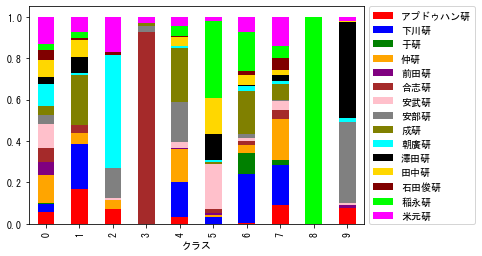

In [6]:
#文字化け on Windowns
plt.rcParams["font.family"] = "MS Gothic"

# plt.rcParams["font.family"] = "Noto Sans CJK JP"

# plt.figure(figsize=[15,20])
#カラー
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", 
        ["red", "blue", "green","orange", "purple", "brown", "pink", "gray", "olive", "cyan", 
         "black", "gold", "maroon", "lime", "fuchsia", "tan"])

cross_survive.plot.bar(stacked=True)
plt.legend( loc='center left', bbox_to_anchor=(1., .5))
# 注意：クラスタリング結果は初期値によって変わる

In [7]:
k=5
df1 = target_docs_df[target_docs_df['クラス']==k]
df1.head()

,年度,学科／研究科,研究室,題目,クラス
453,H19,情報科学科,成研,Webアプリケーションのセキュリティ問題とその対策について,5
472,H20,情報科学科,澤田研,モデル計算機KERNELのI/Oシステムの開発 ～周辺機器の制御～,5
568,H20,情報科学科,澤田研,モデル計算機KERNELのI/Oシステムの開発 ～ボード間通信およびPIC間通信～,5
637,H21,情報科学科,安武研,Androidプラットフォームにおけるインターネットゲートウェイの開発,5
658,H21,情報科学科,稲永研,乗換案内機能を用いた移動スケジュール自動作成Webアプリケーションの開発,5


In [8]:
# 研究室リスト（件数の多い順）
vc = df1['研究室'].value_counts()
n = sum(vc.values)
print(n)
title=",".join([f"{k}({c})" for k,c in vc.items() if c>0.05*n])
print(title)

97
稲永研(36),安武研(21),田中研(17),澤田研(12)


In [9]:
texts =[]
for text in df1['題目'].values:
    texts += [" ".join(mecab_sep(text))]
texts[:5]

['Web アプリケーション セキュリティ 問題 対策',
 'モデル 計算 機 KERNEL I / O システム 開発 \u3000～ 周辺 機器 制御 ～',
 'モデル 計算 機 KERNEL I / O システム 開発 \u3000～ ボード 間 通信 PIC 間 通信 ～',
 'Android プラットフォーム インターネットゲートウェイ 開発',
 '乗換 案内 機能 移動 スケジュール 自動 作成 Web アプリケーション 開発']

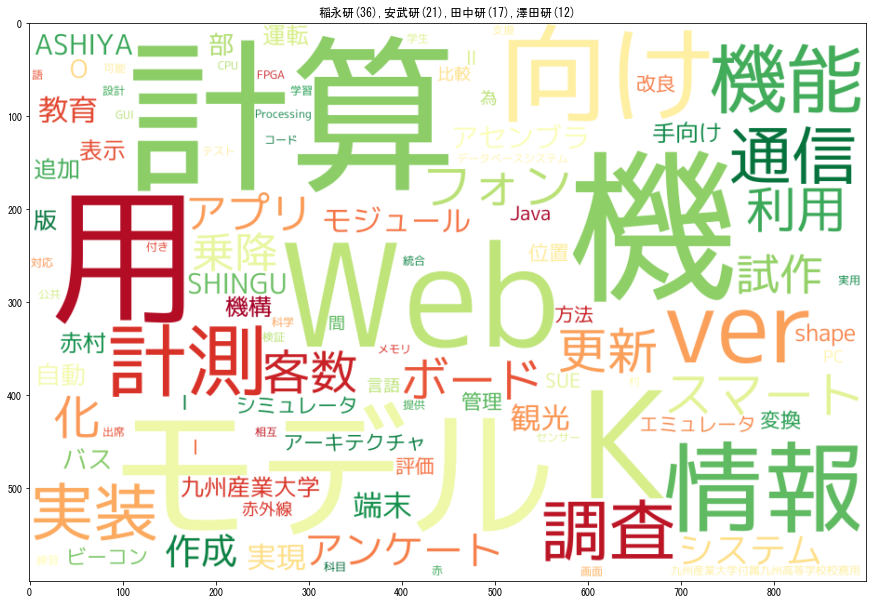

In [10]:
df2 = pd.DataFrame({'text': texts})
npt = nlplot.NLPlot(df2, target_col='text')
# Stopword calculations can be performed.
stopwords = npt.get_stopword(top_n=4, min_freq=0)

fig = plt.figure(figsize=(15, 20))
fig.tight_layout()
fig_wc = npt.wordcloud(
    width = 900,
    height = 600,
    max_words = 100,
    max_font_size = 180,
    colormap = 'RdYlGn', # 'tab20_r',
    stopwords =stopwords,
    mask_file = None,
    save=False
)

# plt.axis('off') 
plt.title(title)
plt.imshow(fig_wc, interpolation="bilinear")      
plt.show()

Cluster No.0: 仲研(81),米元研(78),安武研(68),朝廣研(61),田中研(49),合志研(41),前田研(36),アプドゥハン研(35)


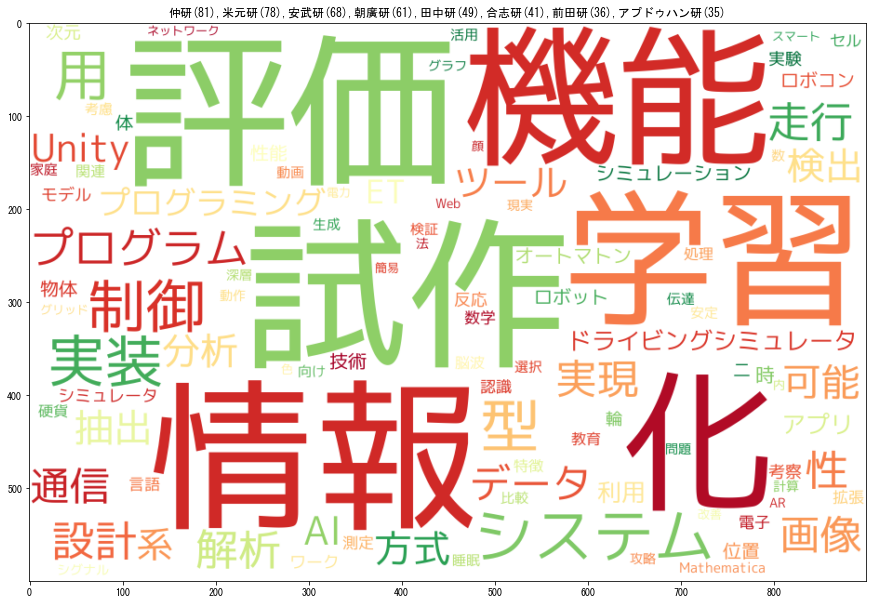

Cluster No.1: 成研(26),下川研(23),アプドゥハン研(18),田中研(9),澤田研(8),米元研(8),仲研(6)


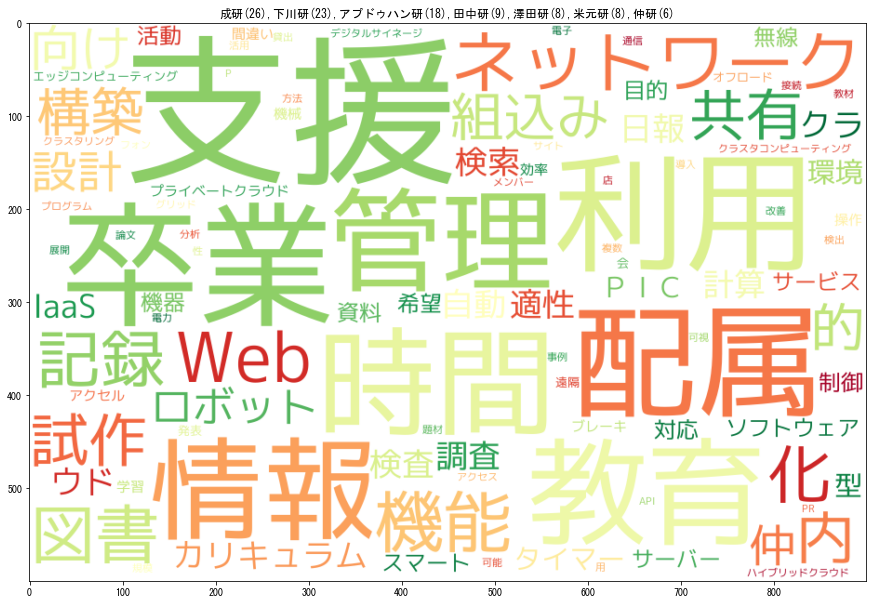

Cluster No.2: 朝廣研(39),米元研(12),安部研(10),アプドゥハン研(5)


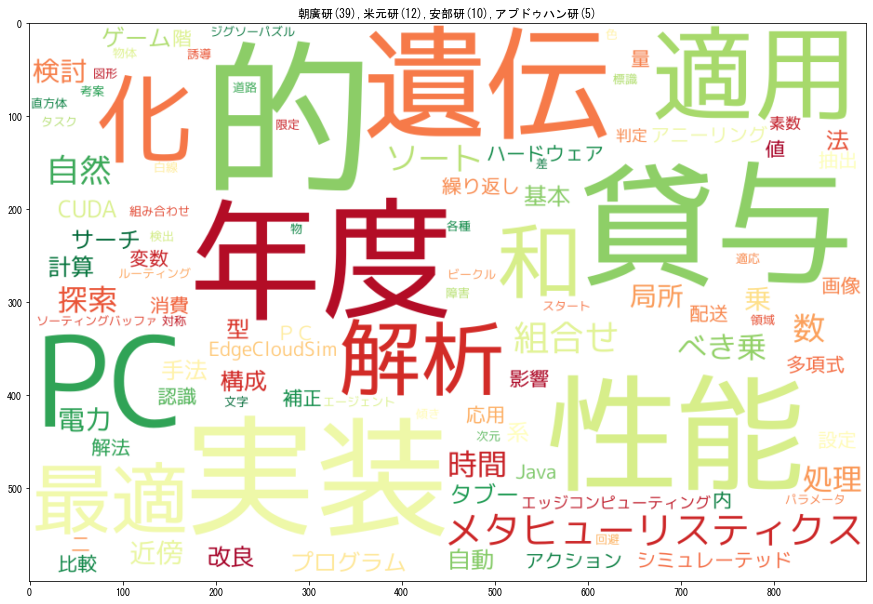

Cluster No.3: 合志研(65)


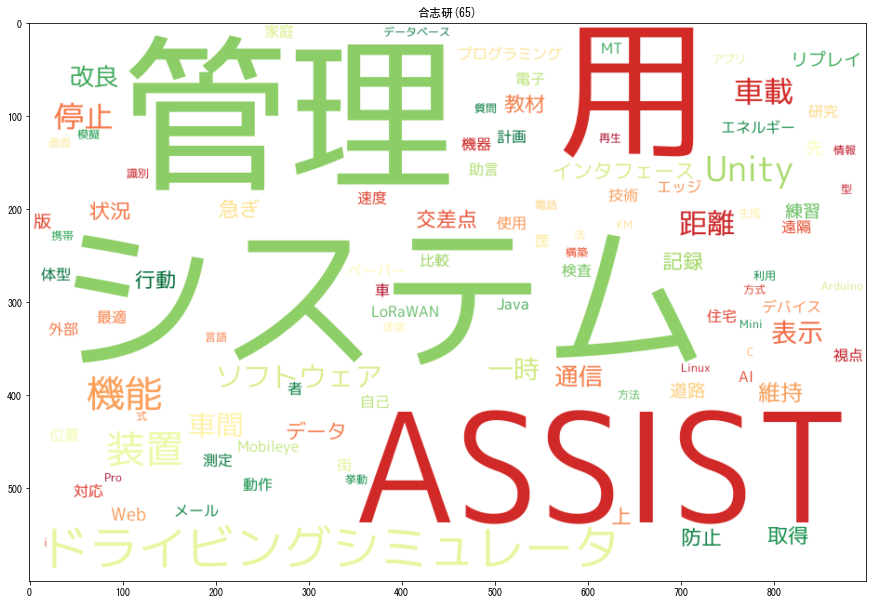

Cluster No.4: 成研(39),安部研(29),下川研(25),仲研(24)


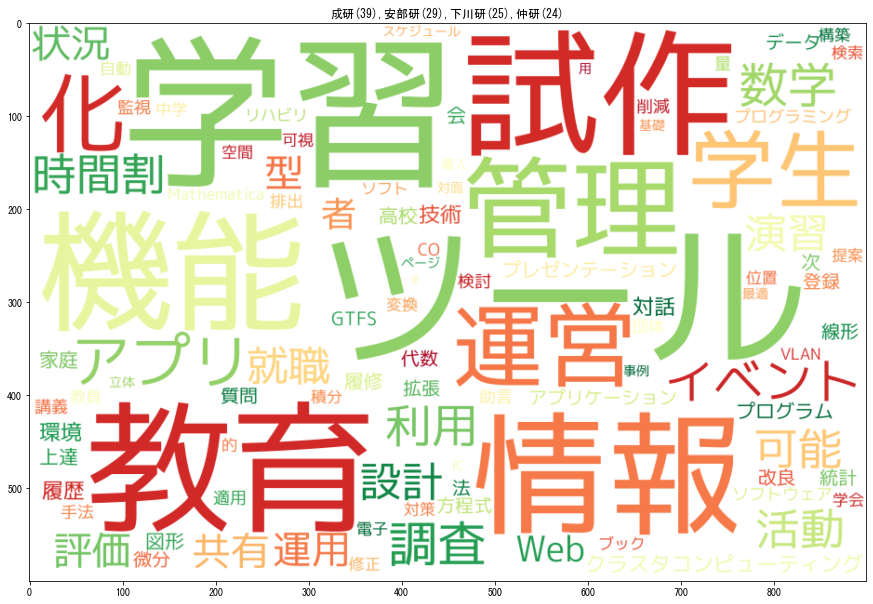

Cluster No.5: 稲永研(36),安武研(21),田中研(17),澤田研(12)


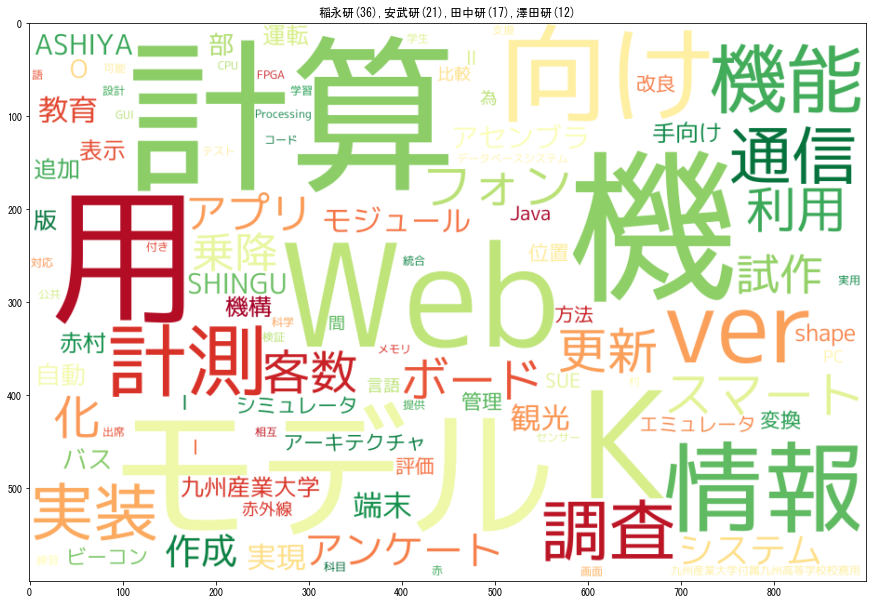

Cluster No.6: 下川研(47),成研(41),稲永研(37),于研(20),米元研(15)


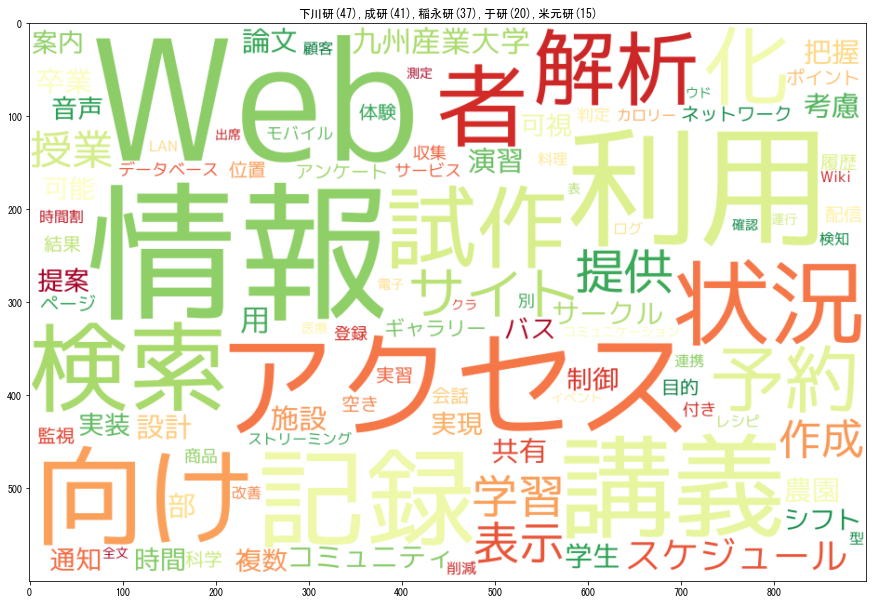

Cluster No.7: 仲研(24),下川研(23),米元研(17),アプドゥハン研(11),成研(9),稲永研(7),石田俊研(7)


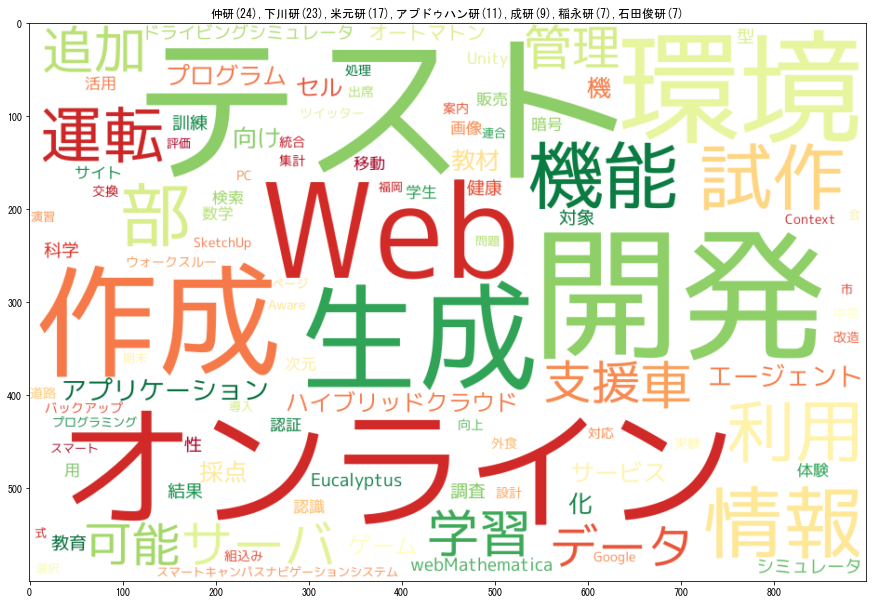

Cluster No.8: 稲永研(41)


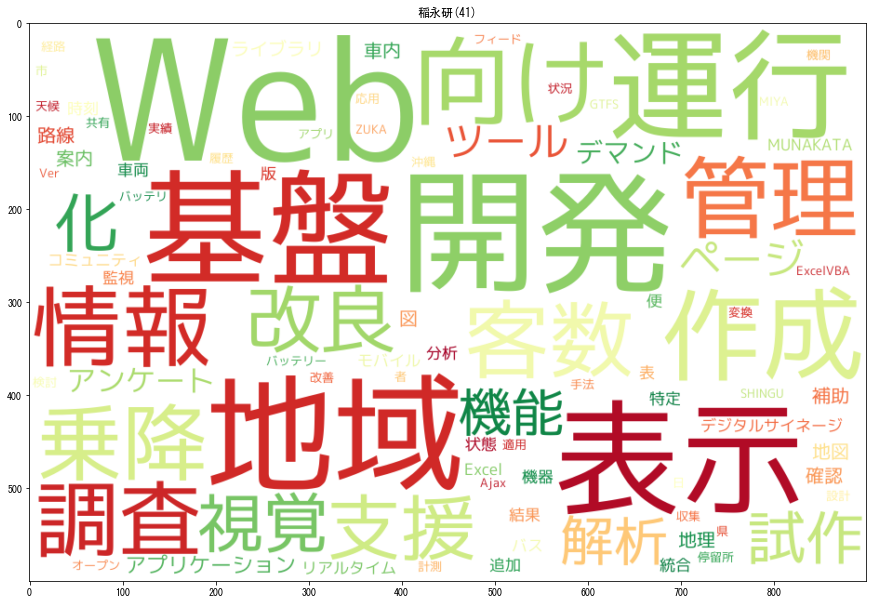

Cluster No.9: 澤田研(50),安部研(42),アプドゥハン研(8)


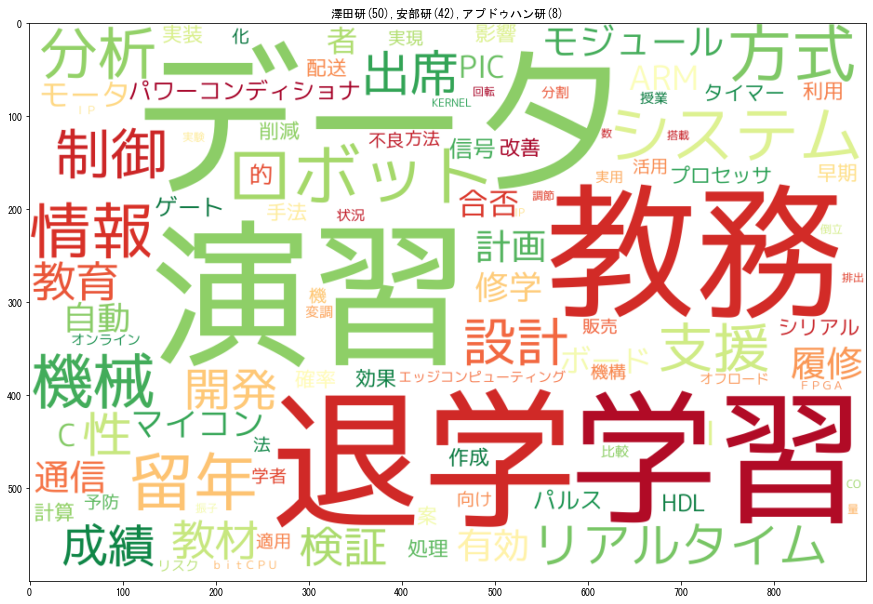

In [11]:
for k in range(n_clust):
    df1 = target_docs_df[target_docs_df['クラス']==k]
    vc = df1['研究室'].value_counts()
    n = sum(vc.values)
    title=",".join([f"{k}({c})" for k,c in vc.items() if c>0.05*n])
    print(f"Cluster No.{k}: {title}")
    
    texts =[]
    for text in df1['題目'].values:
        texts += [" ".join(mecab_sep(text))]
    df2 = pd.DataFrame({'text': texts})
    
    npt = nlplot.NLPlot(df2, target_col='text')
    # Stopword calculations can be performed.
    stopwords = npt.get_stopword(top_n=4, min_freq=0)
    
    fig = plt.figure(figsize=(15, 20))
    fig.tight_layout()
    fig_wc = npt.wordcloud(
        width = 900,
        height = 600,
        max_words = 100,
        max_font_size = 180,
        colormap = 'RdYlGn', # 'tab20_r',
        stopwords =stopwords,
        mask_file = None,
        save=False
    )
    
    # plt.axis('off') 
    plt.title(title)
    plt.imshow(fig_wc, interpolation="bilinear")      
    plt.show()